# Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
Abalone=pd.read_csv("abalone.csv",sep=",") #reading abalone.csv file
Abalone.head() #Looking into top 5 rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
Abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [3]:
Abalone.shape #Checking the shape of our data

(4177, 9)

In [4]:
Abalone.dtypes #Checking the datatype of each attribute

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#In order to get Age we have to add 1.5 years in Rings as per problem statement.
#Rings / integer / -- / +1.5 gives the age in years.
#Dropping Rings column from dataset otherwise linear Regression will give 100% accuracy. Even we don't need Rings anymore.
Abalone['Age'] = Abalone['Rings'] + 1.5
Abalone.drop('Rings', axis = 1, inplace = True)

In [6]:
Abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


As per problem statement Target variable i.e. Age is int64 i.e. continuous value so we'll use Regression to learn our model.

# EDA

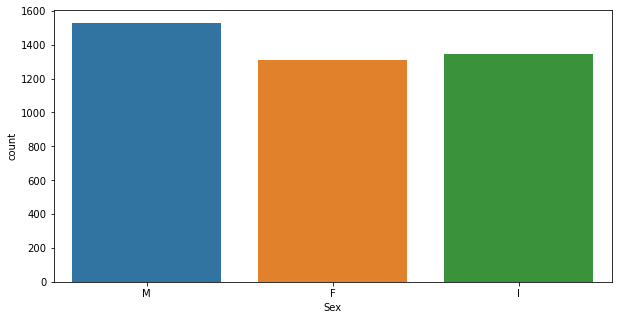

In [7]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(Abalone['Sex'])
plt.show()

We have 3 types of values in Sex - M,F and I. M have more number of rows than F and I.

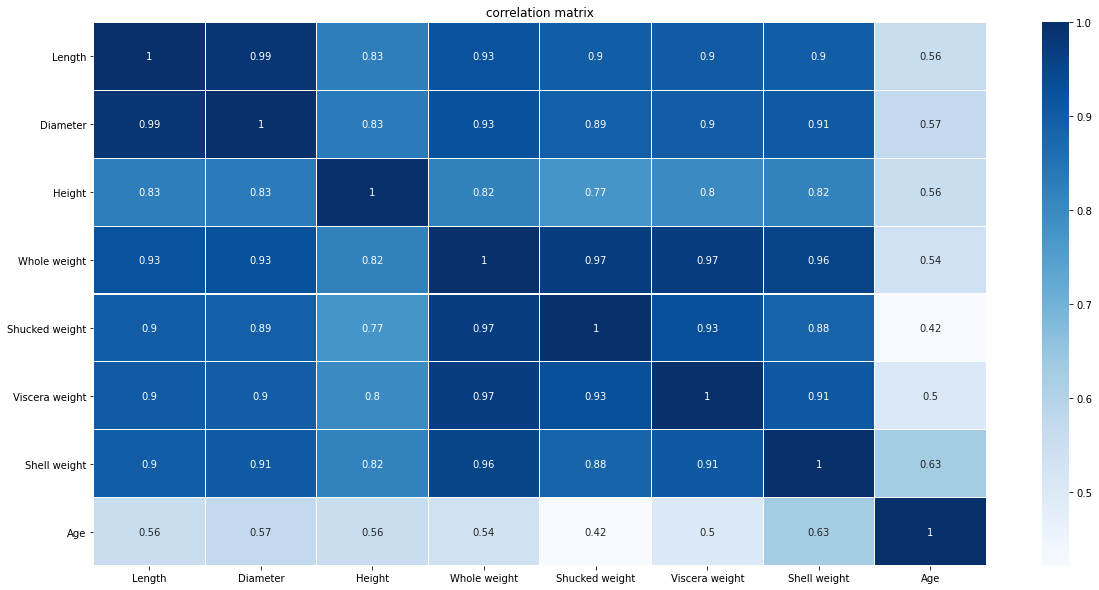

In [8]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Abalone.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

All attribues have good correlation with Age

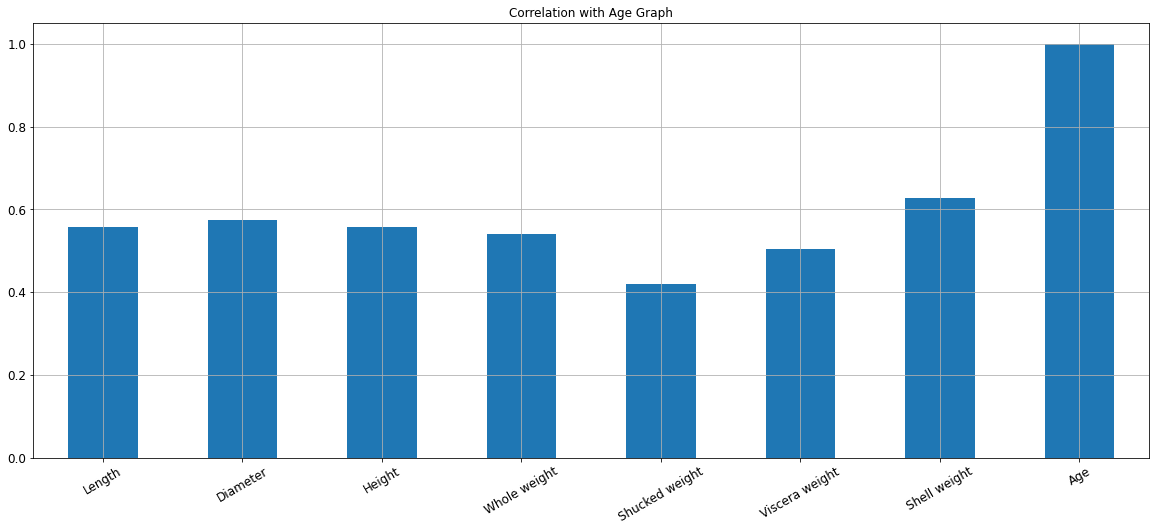

In [9]:
#Correlation with Age with respect to attributes
Abalone.corrwith(Abalone.Age).plot.bar(
        figsize = (20, 8), title = "Correlation with Age Graph", fontsize = 12,
        rot = 30, grid = True)

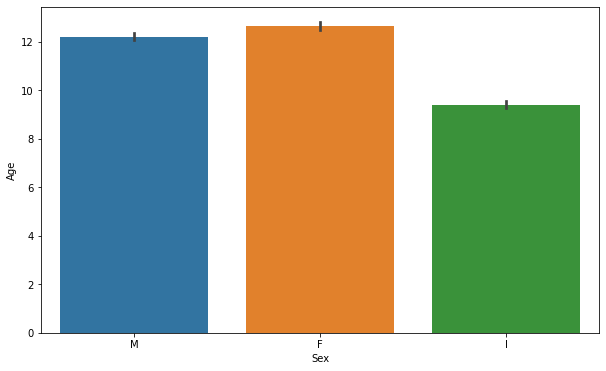

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Sex', y = 'Age', data = Abalone)

The Age of F is more than M and I.

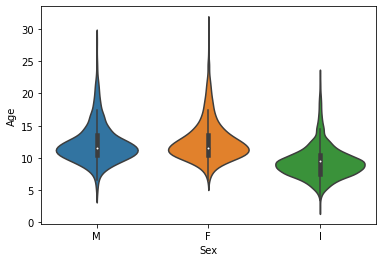

In [11]:
ax = sns.violinplot(x="Sex", y="Age", data=Abalone)

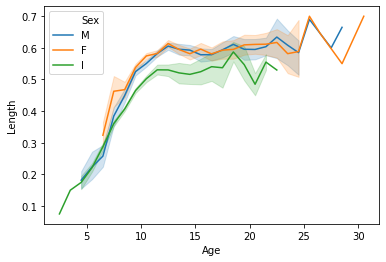

In [12]:
import seaborn as sns

# Plot the responses for different Age and Length
sns.lineplot(x="Age", y="Length",
             hue="Sex",
             data=Abalone)

# Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#Label Encoding for Sex because it's object type and we can't process it.
le = preprocessing.LabelEncoder()
Abalone['Sex'] = le.fit_transform(Abalone['Sex'])

In [14]:
#One hot encoding becuase we don't have more number of columns
y1 = pd.get_dummies(Abalone.Sex, prefix='Sex')
print(y1.head())

   Sex_0  Sex_1  Sex_2
0      0      0      1
1      0      0      1
2      1      0      0
3      0      0      1
4      0      1      0


In [15]:
Abalones=Abalone
#df=Abalone
# Get one hot encoding of columns Sex
one_hot = pd.get_dummies(Abalones['Sex'], prefix='Sex')
# Drop column Sex as it is now encoded
Abalones = Abalones.drop('Sex',axis = 1)
# Join the encoded Abalones
Abalones = Abalones.join(one_hot)

Abalone = Abalones 
Abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_0,Sex_1,Sex_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


# DATA CLEANING

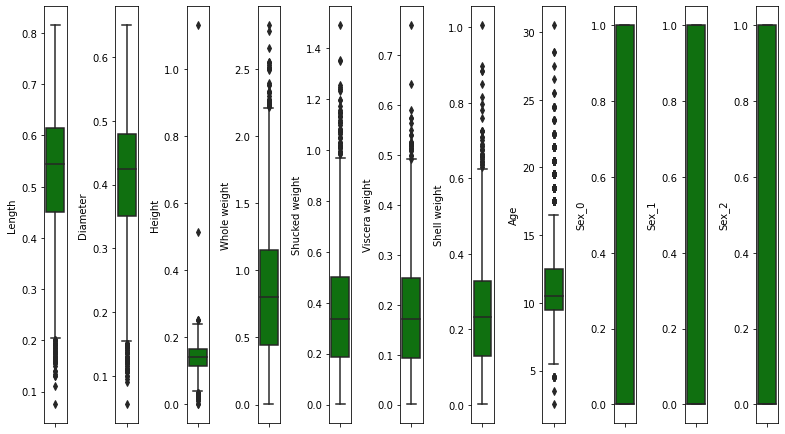

In [16]:
#Visualising the outliers
collist=Abalone.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Abalone[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [17]:
#Moved Age i.e. target variable at last
x=Abalone.pop('Age')
Abalone['Age']=x
Abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_0,Sex_1,Sex_2,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0,11.5


In [18]:
##Removing the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Abalone))
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [19]:
#checking the shape of the data
#df=Abalone
df=Abalone[(z<3).all(axis = 1)]
print(Abalone.shape)
print(df.shape)

(4177, 11)
(4027, 11)


In [20]:
#checking for how much data we lost
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


we lost almost 3.5% of our data. So we can procced.

# Seprate independent variable and target variable

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [22]:
import numpy as np
#changing the shape of target variable
y=np.ravel(y)

# Removing Skewness

In [23]:
#Removing skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
#adding the columns heading
df_new=pd.DataFrame(df_new,columns=x.columns)
x=df_new
x.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Sex_0             0.821149
Sex_1             0.731618
Sex_2             0.576507
dtype: float64

Now the skewness is good for all the columns

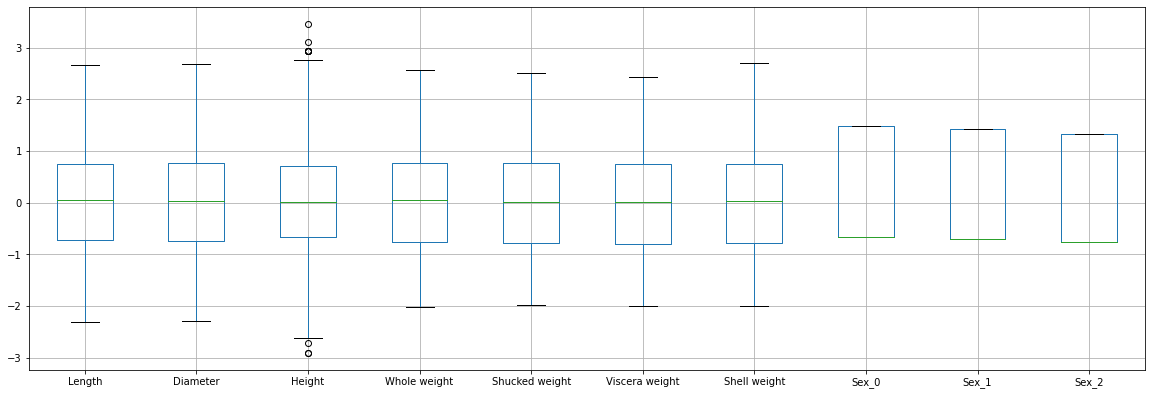

In [24]:
#Checking the outliers again
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Finding Best Random State

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5555685800367685  on Random_state  82


# Train Test Split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [27]:
#Linear Regression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
LR = LinearRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predlr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predlr))
print("Mean Squared error:      ", mean_squared_error(y_test,predlr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predlr)))

R2 Score:                 0.5555685800367685
Mean Absolute Error:      1.4572536196025627
Mean Squared error:       3.8190786008768605
Root Mean Squared Error:  1.954246299952199


In [28]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predrf))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predrf))
print("Mean Squared error:      ", mean_squared_error(y_test,predrf))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predrf)))

R2 Score:                 0.5633644444649673
Mean Absolute Error:      1.4300909842845326
Mean Squared error:       3.7520873449131518
Root Mean Squared Error:  1.9370305482653472


In [29]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.1807801863717693
Mean Absolute Error:      1.911497105045492
Mean Squared error:       7.039702233250621
Root Mean Squared Error:  2.6532437191578575


In [30]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
preddt=KNR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.4986925314832563
Mean Absolute Error:      1.502398676592225
Mean Squared error:       4.3078246484698095
Root Mean Squared Error:  2.075529968097259


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
preddt=GBR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.5738431068438773
Mean Absolute Error:      1.3934088099904567
Mean Squared error:       3.6620423268079527
Root Mean Squared Error:  1.9136463431909128


In [32]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train,y_train)
preddt=Ridge.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.5547230681535993
Mean Absolute Error:      1.4582664672158259
Mean Squared error:       3.826344235561433
Root Mean Squared Error:  1.9561043519100492


In [33]:
from sklearn.svm import SVR
Svr = SVR()
Svr.fit(x_train,y_train)
preddt=Svr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.5547744154714571
Mean Absolute Error:      1.3895011235768226
Mean Squared error:       3.825902998884558
Root Mean Squared Error:  1.9559915641138532


LinearRegression, RandomForestRegressor, GradientBoostingRegressor and SVR have highest Accuracy Score, it's maybe because of overfitting.

To find best algorithm, need to check cross_val_score.

# Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),SVR()]
name=["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","KNeighborsRegressor","GradientBoostingRegressor","SVR"]
for i in model:
    scr=cross_val_score(i ,x , y, cv=5)
    print("Cross validation score of",i,scr.mean())

Cross validation score of LinearRegression() 0.44131344389153765
Cross validation score of RandomForestRegressor() 0.45922895256516905
Cross validation score of DecisionTreeRegressor() -0.04436660774122862
Cross validation score of KNeighborsRegressor() 0.3994103738075611
Cross validation score of GradientBoostingRegressor() 0.4753420046944542
Cross validation score of SVR() 0.48882363298607984


Cross validation Acore of SVR is near to it's Accuracy Score. So we'll conclude that SVR have highest accuracy.

# Hyper Parameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma' :['scale', 'auto']}
#parameters = {'fit_intercept':['bool','default=True'],
#             'normalize':['bool','default=True']}

clf = GridSearchCV(SVR(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'gamma': 'scale', 'kernel': 'rbf'}

In [36]:
clf_pred = clf.best_estimator_.predict(x_test)

In [37]:
r2_score(y_test, clf_pred)

0.5547744154714571

Our model learnt 55%

# Saving the model

In [38]:
import joblib
joblib.dump(clf.best_estimator_,"PJ4_Abalone.pkl")
SVR_from_joblib=joblib.load('PJ4_Abalone.pkl')
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([12.54388913, 11.31250008, 12.31233778, ..., 12.17527849,
        6.13427681,  6.69101195])

In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

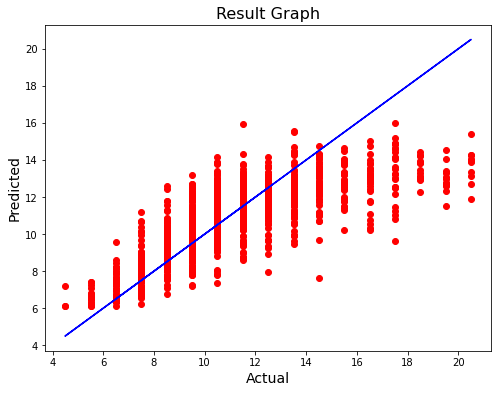

In [40]:
#Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=Predicted,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()